# Práctica 2

### Parte 2 - Modelo polinomial de calidad de vinos

In [1]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import matplotlib as mp
from matplotlib import pyplot as plt
#from sklearn.linear_model import LinearRegression
import tensorflow as tf
import datetime, os
##from datetime import timedelta

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
def f_spgraph(p_x, p_y,p_title,p_xlabel, p_ylabel):
##    fig = plt.figure()
#    ax = fig.add_subplot(1,1,1)
#    ax.scatter(p_x, p_y)
#    ax.set_xlabel(p_xlabel)
#    ax.set_ylabel(p_ylabel)
#    ax.set_title(p_title)
#    plt.show()
    
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = p_x, y = p_y, color = 'mediumseagreen')
    plt.title(p_title, fontdict = {'fontsize':15})
    maxDist = max(max(p_y), max(p_x)) 
    minDist = min(min(p_y), min(p_x)) 
    plt.xlabel(p_xlabel, fontdict= {'fontsize':13})
    plt.ylabel(p_ylabel, fontdict= {'fontsize':13})
    plt.tight_layout();

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

**Variable a predecir:** *12. quality (puntuacion  entre 0 y 10)*

## Carga y depuración de los Datos

In [4]:
data = pd.read_csv('winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis Exploratorio

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Gráficas de cada columna

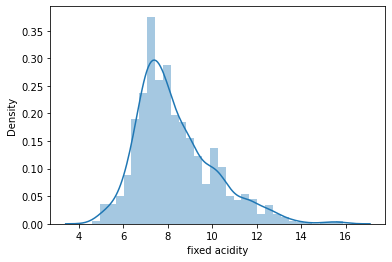

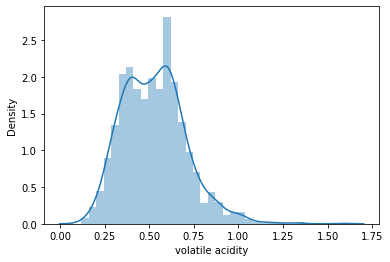

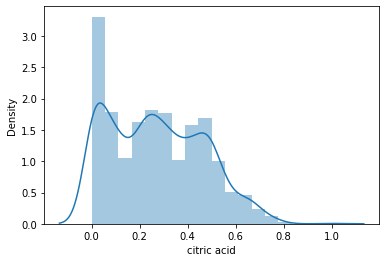

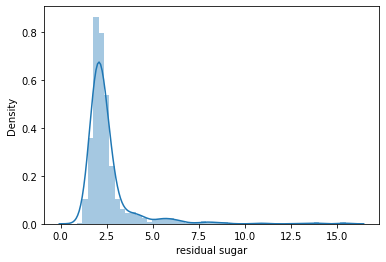

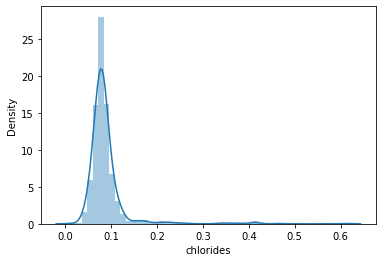

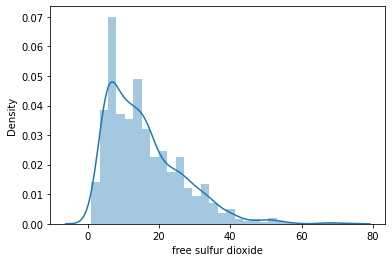

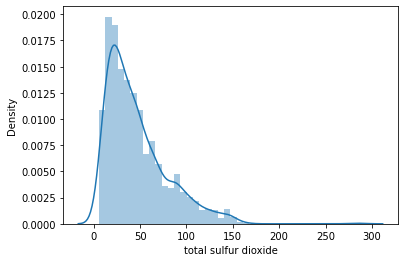

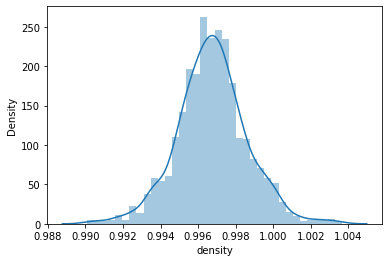

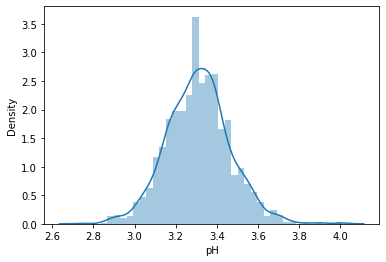

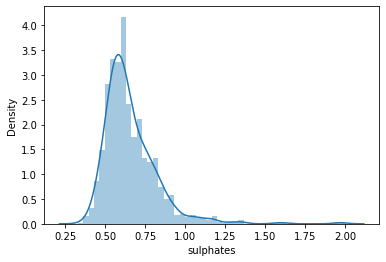

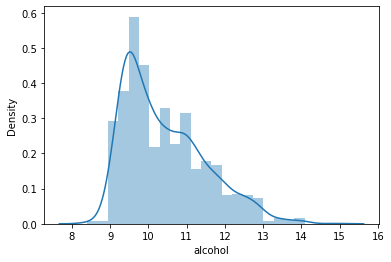

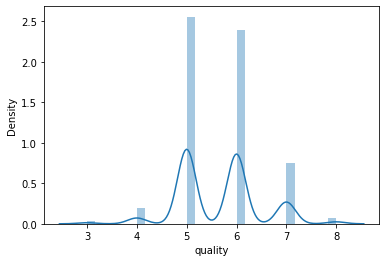

In [7]:
# desactiva mensajes futureWarnings
import warnings
warnings.filterwarnings("ignore")
# create distplots
for column in data.columns:
    plt.figure()
    sns.distplot(data[column])

## Cálculo de coeficiente de correlación

### Gráficas de correlación de todas las variables respecto a ***quality***

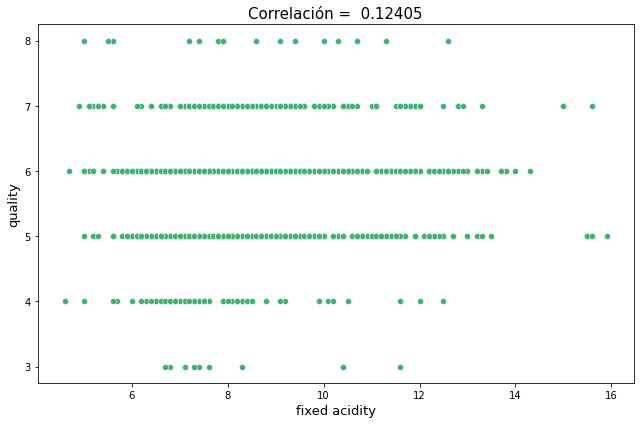

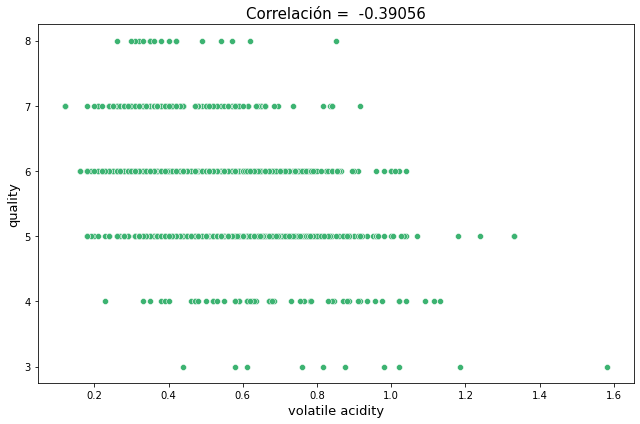

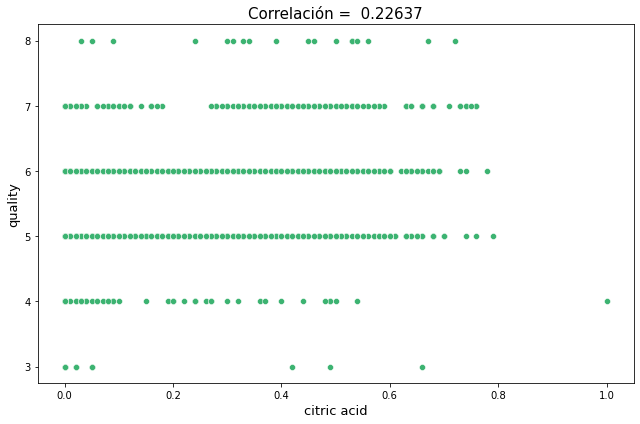

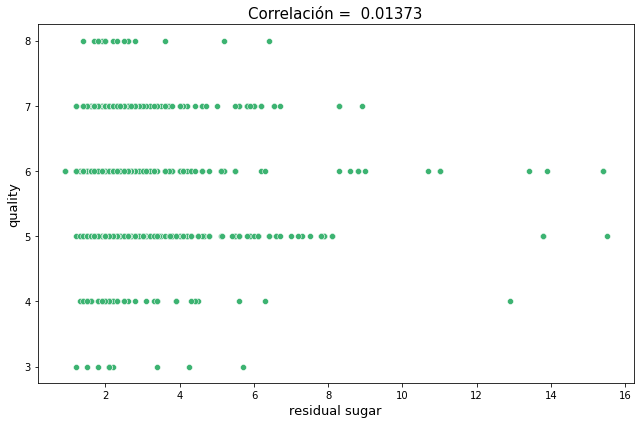

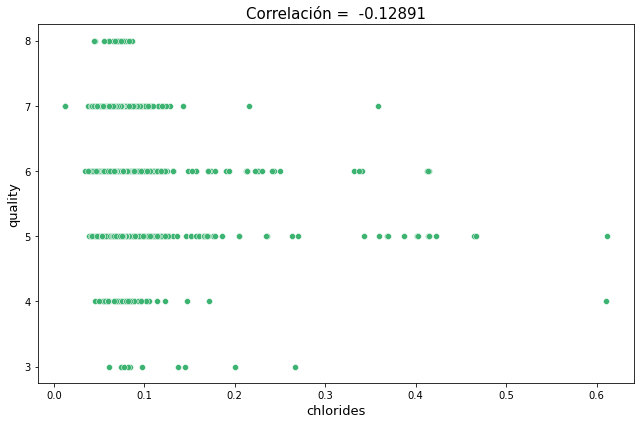

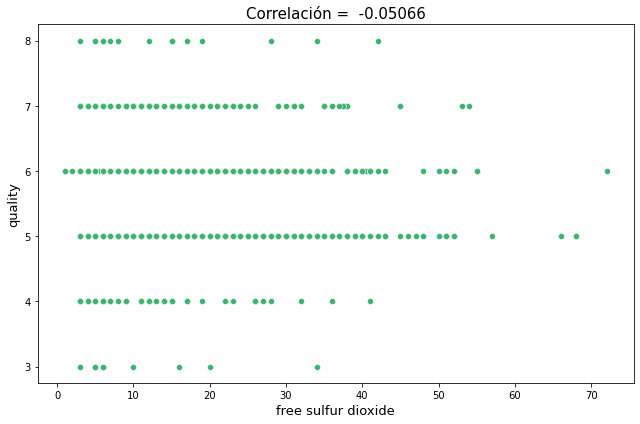

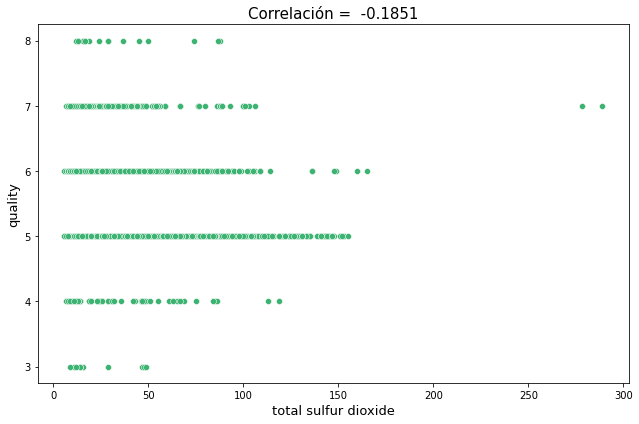

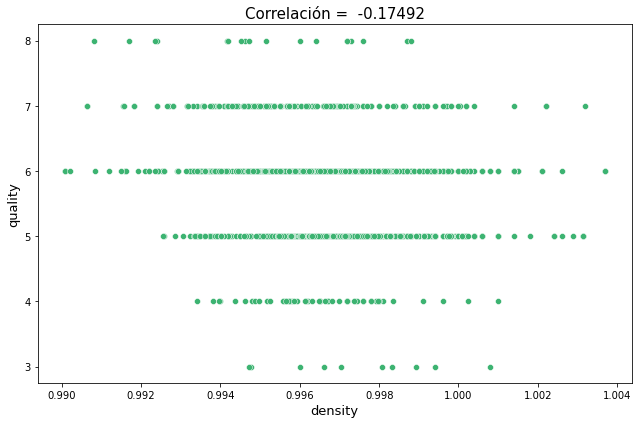

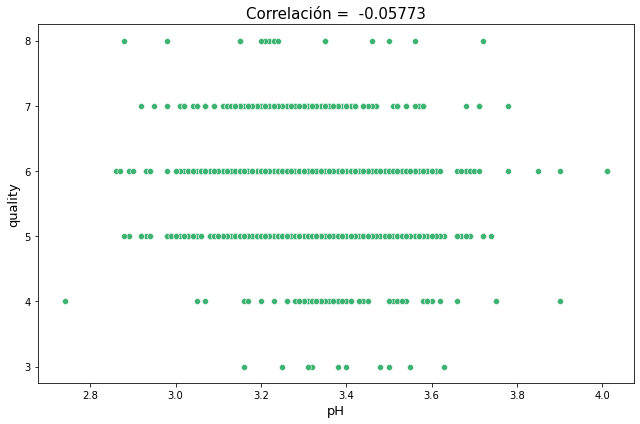

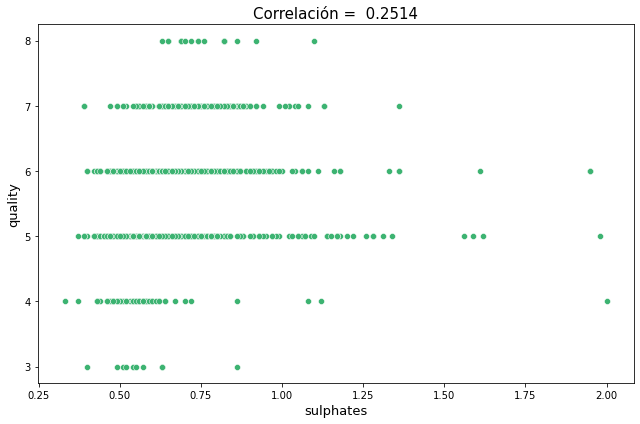

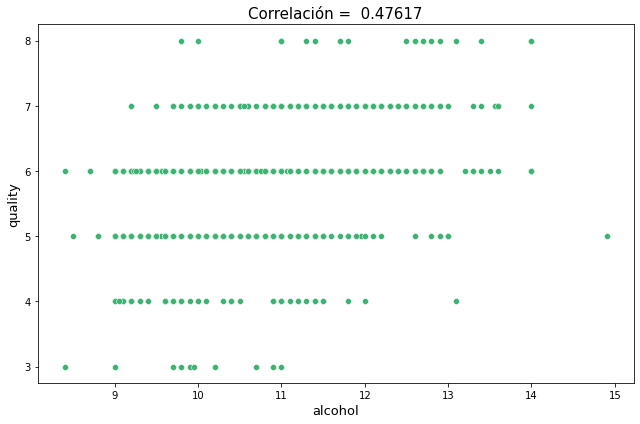

In [8]:
for i in range(0, len(data.columns)-1):
# Cálculo de la correlación para colocarla como título
    v_corr = round(data[data.columns[i]].corr(data['quality'], method='pearson'),5)
    title = "Correlación =  " + str(v_corr)
    f_spgraph(data[data.columns[i]],data['quality'], title, data.columns[i],data.columns[-1])

In [9]:
Corr_Matrix = round(data.corr(),2)
print(Corr_Matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [10]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.260000,0.670000,0.110000,0.090000,-0.150000,-0.110000,0.670000,-0.680000,0.180000,-0.060000,0.120000
volatile acidity,-0.260000,1.000000,-0.550000,0.000000,0.060000,-0.010000,0.080000,0.020000,0.230000,-0.260000,-0.200000,-0.390000
citric acid,0.670000,-0.550000,1.000000,0.140000,0.200000,-0.060000,0.040000,0.360000,-0.540000,0.310000,0.110000,0.230000
residual sugar,0.110000,0.000000,0.140000,1.000000,0.060000,0.190000,0.200000,0.360000,-0.090000,0.010000,0.040000,0.010000
chlorides,0.090000,0.060000,0.200000,0.060000,1.000000,0.010000,0.050000,0.200000,-0.270000,0.370000,-0.220000,-0.130000
free sulfur dioxide,-0.150000,-0.010000,-0.060000,0.190000,0.010000,1.000000,0.670000,-0.020000,0.070000,0.050000,-0.070000,-0.050000
total sulfur dioxide,-0.110000,0.080000,0.040000,0.200000,0.050000,0.670000,1.000000,0.070000,-0.070000,0.040000,-0.210000,-0.190000
density,0.670000,0.020000,0.360000,0.360000,0.200000,-0.020000,0.070000,1.000000,-0.340000,0.150000,-0.500000,-0.170000
pH,-0.680000,0.230000,-0.540000,-0.090000,-0.270000,0.070000,-0.070000,-0.340000,1.000000,-0.200000,0.210000,-0.060000
sulphates,0.180000,-0.260000,0.310000,0.010000,0.370000,0.050000,0.040000,0.150000,-0.200000,1.000000,0.090000,0.250000


## Variables a considerar por mostrar una aparente correlación con ***quality***
Según lo que se puede comprobar, tanto en las gráficas, matrices y el mapa de correlación, las variables que consideramos para el modelo son:
### citric acid 0.22637
### sulphates .2514
### alcohol 0.47617

## Separación del Set de Datos para Entrenamiento y de Pruebas

In [11]:
#verificación de tamaño de archivo
print("shape of data:",data.shape)

numrows, numcols = data.shape;
trainrows = int(numrows * 0.8);

datatrain = data[:trainrows]
datatest = data[trainrows:]

print("Tamaño dataset de entrenamiento: ",len(datatrain), 'y de pruebas: ',len(datatest))


shape of data: (1599, 12)
Tamaño dataset de entrenamiento:  1279 y de pruebas:  320


## Definición de la clase para el Modelo Aplicando Tensorflow

In [12]:
# Clase para el modelo polinomial
class polinomial:
    def __init__(self, feat):
        
        #vector de weights con n features
        self.w = tf.get_variable("weights", dtype = tf.float32, shape = [1, feat], initializer = tf.zeros_initializer())
    
    # Funcion para generar prediccion de modelo    
    def __call__(self, x):
        with tf.name_scope("model"):
            return tf.matmul(self.w, x)
     
    # Actualia parámetros usando gradient descent
    def actualiza(self, xtr, ytr, xte, yte, lg):
        with tf.name_scope("error"):
            trError = self.error(xtr, ytr)
            trErrorSumm = tf.summary.scalar("TrError", trError)
            teError = self.error(xte, yte)
            teErrorSumm = tf.summary.scalar("TeError", teError)
        gradient = tf.gradients(teError, [self.w])
        upd_w = tf.assign(self.w, self.w - lg * gradient[0])
        return upd_w, trError, teError, trErrorSumm, teErrorSumm
    
    # Calcula MSE
    def error(self, x, y):
        error = 1/2 * tf.reduce_mean(tf.math.square(y - self(x)))
        return error

In [13]:
# Entrenamiento
def f_entrena(featTrain, ytr, featTest, yte, pdg, lr, epochs, visual):
    
    #definicion de features
    from sklearn.preprocessing import PolynomialFeatures
    
    xtrain = PolynomialFeatures(pdg).fit_transform(featTrain)
    xtest = PolynomialFeatures(pdg).fit_transform(featTest)

    v_features = xtrain.shape[1]
    v_rows = xtrain.shape[0]
    v_rowstest = xtest.shape[0]

    #string para definición de experimento
    string = './graphsVinos/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"_lr="+str(lr)+ "_epochs="+str(epochs) + "pdg=" + str(pdg)

#    tf.reset_default_graph()
    gr = tf.Graph()
    
    with gr.as_default():
        # Definición de placeholders para input de data
        t_xtrain = tf.placeholder(tf.float32, [v_features, v_rows], "t_xtrain")
        t_ytrain = tf.placeholder(tf.float32, [v_rows], "t_ytrain")
        t_xtest = tf.placeholder(tf.float32, [v_features, v_rowstest], "t_xtest")
        t_ytest = tf.placeholder(tf.float32, [v_rowstest], "t_ytest")
        
        # Inicialización de objeto de clase
        model = polinomial(v_features)

        # Utilizacion de metodo update para hacer el entrenamiento
        parametros = model.actualiza(t_xtrain, t_ytrain, t_xtest, t_ytest, lr)
        
        #Writer para utilizacion de tensorboard
        writer = tf.summary.FileWriter(string, gr)
        
        with tf.train.MonitoredSession() as session:
            feed_dict = {t_xtrain:xtrain.T, t_ytrain:ytr, t_xtest:xtest.T, t_ytest:yte}
            
            for i in range(epochs + 1):
                
                #Entrenamiento
                training = session.run(parametros, feed_dict = feed_dict)
                
                if (i)%visual == 0:
                    # Actualiza las predicciones del modelo
                    weights = session.run(model.w, feed_dict = feed_dict)

                    # Escribe en archivo de entrenamiento
                    writer.add_summary(training[3], i)
                    writer.add_summary(training[4], i)
#                   print("Epoch: ", i, "Training Cost: ", training[1], "Test Cost: ", training[2])
                    print("Conteo epoch: ", i, "Costo Entrenamiento: ", training[1], "Costo del Test: ",training[2])
                    
            return weights, training[1], training[2]
        
        writer.close()

In [14]:
# Definición de features y variables dependientes para el set de entrenamiento y el set de prueba
feat_train = datatrain[['sulphates','volatile acidity', 'alcohol']]
ytr = datatrain['quality']

feat_test= datatest[['sulphates','volatile acidity', 'alcohol']]
yte = datatest['quality']

In [15]:
# def f_entrena(featTrain, ytr, featTest, yte, pdg, lr, epochs, visual):
f_entrena(feat_train, ytr, feat_test, yte, 2, 0.0001, 1000, 100)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  100 Costo Entrenamiento:  0.58236647 Costo del Test:  0.4759617
Conteo epoch:  200 Costo Entrenamiento:  0.5715027 Costo del Test:  0.46821937
Conteo epoch:  300 Costo Entrenamiento:  0.5611083 Costo del Test:  0.46078768
Conteo epoch:  400 Costo Entrenamiento:  0.5511607 Costo del Test:  0.4536519
Conteo epoch:  500 Costo Entrenamiento:  0.5416382 Costo del Test:  0.4467987
Conteo epoch:  600 Costo Entrenamiento:  0.5325203 Costo del Test:  0.44021457
Conteo epoch:  700 Costo Entrenamiento:  0.52378756 Costo del Test:  0.4338873
Conteo epoch:  800 Costo Entrenamiento:  0.51542157 Costo del Test:  0.427805
Conteo epoch:  900 Costo Entrenamiento:  0.5074045 Costo del Test:  0.42195636
Conteo epoch:  1000 Costo Entrenamiento:  0.49972 Costo del Test:  0.41633072


(array([[ 0.01153724,  0.00880737,  0.00386113,  0.06393205,  0.00704574,
          0.00355505,  0.05607734, -0.00027084,  0.00793583,  0.03859839]],
       dtype=float32),
 0.49972,
 0.41633072)

In [16]:
f_entrena(feat_train, ytr, feat_test, yte, 3, 0.000001, 100000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  1000 Costo Entrenamiento:  0.983063 Costo del Test:  0.7429935
Conteo epoch:  2000 Costo Entrenamiento:  0.79140335 Costo del Test:  0.614995
Conteo epoch:  3000 Costo Entrenamiento:  0.66771173 Costo del Test:  0.52956355
Conteo epoch:  4000 Costo Entrenamiento:  0.58316135 Costo del Test:  0.469158
Conteo epoch:  5000 Costo Entrenamiento:  0.52218217 Costo del Test:  0.4242896
Conteo epoch:  6000 Costo Entrenamiento:  0.47607082 Costo del Test:  0.38958207
Conteo epoch:  7000 Costo Entrenamiento:  0.43980783 Costo del Test:  0.36186373
Conteo epoch:  8000 Costo Entrenamiento:  0.41040477 Costo del Test:  0.33918813
Conteo epoch:  9000 Costo Entrenamiento:  0.38601744 Costo del Test:  0.32031068
Conteo epoch:  10000 Costo Entrenamiento:  0.36546123 Costo del Test:  0.3044005
Co

Conteo epoch:  100000 Costo Entrenamiento:  0.23130372 Costo del Test:  0.20614807


(array([[ 3.1102493e-03,  1.3917672e-03,  1.0036434e-03,  2.1594387e-02,
          1.7797749e-04,  4.7060213e-04,  7.7955788e-03, -4.8916979e-04,
          4.7389148e-03,  1.1287476e-01, -6.9179852e-04, -1.0150517e-05,
         -2.6105908e-03, -2.3021548e-04,  1.5520490e-03,  1.1680816e-02,
         -1.6934951e-03, -8.6191911e-03, -9.2711020e-03, -6.3745598e-03]],
       dtype=float32),
 0.23130372,
 0.20614807)

In [17]:
f_entrena(feat_train, ytr, feat_test, yte, 2, 0.000001, 100000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  1000 Costo Entrenamiento:  0.5925682 Costo del Test:  0.483208
Conteo epoch:  2000 Costo Entrenamiento:  0.5914097 Costo del Test:  0.48238975
Conteo epoch:  3000 Costo Entrenamiento:  0.5902613 Costo del Test:  0.48157477
Conteo epoch:  4000 Costo Entrenamiento:  0.589118 Costo del Test:  0.48076326
Conteo epoch:  5000 Costo Entrenamiento:  0.58798105 Costo del Test:  0.4799551
Conteo epoch:  6000 Costo Entrenamiento:  0.5868529 Costo del Test:  0.47915015
Conteo epoch:  7000 Costo Entrenamiento:  0.58572435 Costo del Test:  0.47834834
Conteo epoch:  8000 Costo Entrenamiento:  0.5846008 Costo del Test:  0.47754985
Conteo epoch:  9000 Costo Entrenamiento:  0.58348256 Costo del Test:  0.47675472
Conteo epoch:  10000 Costo Entrenamiento:  0.5823689 Costo del Test:  0.47596264
Cont

Conteo epoch:  100000 Costo Entrenamiento:  0.49972504 Costo del Test:  0.41633576


(array([[ 0.01152638,  0.00879897,  0.00385748,  0.06387479,  0.007039  ,
          0.00355168,  0.05602418, -0.00027044,  0.00792994,  0.03860747]],
       dtype=float32),
 0.49972504,
 0.41633576)

In [18]:
f_entrena(feat_train, ytr, feat_test, yte, 3, 0.000001, 100000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  1000 Costo Entrenamiento:  0.983063 Costo del Test:  0.7429935
Conteo epoch:  2000 Costo Entrenamiento:  0.79140335 Costo del Test:  0.614995
Conteo epoch:  3000 Costo Entrenamiento:  0.66771173 Costo del Test:  0.52956355
Conteo epoch:  4000 Costo Entrenamiento:  0.58316135 Costo del Test:  0.469158
Conteo epoch:  5000 Costo Entrenamiento:  0.52218217 Costo del Test:  0.4242896
Conteo epoch:  6000 Costo Entrenamiento:  0.47607082 Costo del Test:  0.38958207
Conteo epoch:  7000 Costo Entrenamiento:  0.43980783 Costo del Test:  0.36186373
Conteo epoch:  8000 Costo Entrenamiento:  0.41040477 Costo del Test:  0.33918813
Conteo epoch:  9000 Costo Entrenamiento:  0.38601744 Costo del Test:  0.32031068
Conteo epoch:  10000 Costo Entrenamiento:  0.36546123 Costo del Test:  0.3044005
Co

Conteo epoch:  100000 Costo Entrenamiento:  0.23130372 Costo del Test:  0.20614807


(array([[ 3.1102493e-03,  1.3917672e-03,  1.0036434e-03,  2.1594387e-02,
          1.7797749e-04,  4.7060213e-04,  7.7955788e-03, -4.8916979e-04,
          4.7389148e-03,  1.1287476e-01, -6.9179852e-04, -1.0150517e-05,
         -2.6105908e-03, -2.3021548e-04,  1.5520490e-03,  1.1680816e-02,
         -1.6934951e-03, -8.6191911e-03, -9.2711020e-03, -6.3745598e-03]],
       dtype=float32),
 0.23130372,
 0.20614807)

In [23]:
f_entrena(feat_train, ytr, feat_test, yte, 3, 0.0000001, 50000, 5000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  5000 Costo Entrenamiento:  1.1200935 Costo del Test:  0.83260804
Conteo epoch:  10000 Costo Entrenamiento:  0.98309076 Costo del Test:  0.74301064
Conteo epoch:  15000 Costo Entrenamiento:  0.87615687 Costo del Test:  0.6720974
Conteo epoch:  20000 Costo Entrenamiento:  0.79143417 Costo del Test:  0.61501455
Conteo epoch:  25000 Costo Entrenamiento:  0.72329974 Costo del Test:  0.56833065
Conteo epoch:  30000 Costo Entrenamiento:  0.6677389 Costo del Test:  0.52958155
Conteo epoch:  35000 Costo Entrenamiento:  0.6217561 Costo del Test:  0.49697113
Conteo epoch:  40000 Costo Entrenamiento:  0.5831829 Costo del Test:  0.46917287
Conteo epoch:  45000 Costo Entrenamiento:  0.5504036 Costo del Test:  0.44520026
Conteo epoch:  50000 Costo Entrenamiento:  0.52220076 Costo del Test:  0.

(array([[ 1.0850104e-03,  6.3967920e-04,  4.5894185e-04,  7.7950233e-03,
          3.8797726e-04,  2.7833175e-04,  4.4270912e-03,  1.3028037e-04,
          2.7670774e-03,  4.2253811e-02,  2.4608470e-04,  1.7522924e-04,
          2.5218672e-03,  9.6080643e-05,  1.6456654e-03,  2.1123258e-02,
         -8.0599071e-05,  9.9122321e-05,  6.5525873e-03, -1.1747809e-03]],
       dtype=float32),
 0.52220076,
 0.4243033)

In [24]:
f_entrena(feat_train, ytr, feat_test, yte, 3, 0.0000001, 100000, 10000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Costo Entrenamiento:  16.369038 Costo del Test:  15.565625
Conteo epoch:  10000 Costo Entrenamiento:  0.98309076 Costo del Test:  0.74301064
Conteo epoch:  20000 Costo Entrenamiento:  0.79143417 Costo del Test:  0.61501455
Conteo epoch:  30000 Costo Entrenamiento:  0.6677389 Costo del Test:  0.52958155
Conteo epoch:  40000 Costo Entrenamiento:  0.5831829 Costo del Test:  0.46917287
Conteo epoch:  50000 Costo Entrenamiento:  0.52220076 Costo del Test:  0.4243033
Conteo epoch:  60000 Costo Entrenamiento:  0.47608486 Costo del Test:  0.38959303
Conteo epoch:  70000 Costo Entrenamiento:  0.43982178 Costo del Test:  0.36187473
Conteo epoch:  80000 Costo Entrenamiento:  0.4104179 Costo del Test:  0.33919865
Conteo epoch:  90000 Costo Entrenamiento:  0.38602808 Costo del Test:  0.3203195
Conteo epoch:  100000 Costo Entrenamiento:  0.36547413 Costo del Test: 

(array([[ 1.68708514e-03,  9.02419619e-04,  6.46219589e-04,
          1.21005047e-02,  4.55374189e-04,  3.43652064e-04,
          5.91567671e-03,  1.04297724e-04,  3.58928437e-03,
          6.54406026e-02,  1.95753411e-04,  1.66874452e-04,
          2.38539861e-03,  6.54966789e-05,  1.63693796e-03,
          2.26919968e-02, -2.47090531e-04, -8.80927197e-04,
          2.69835582e-03, -3.23710032e-03]], dtype=float32),
 0.36547413,
 0.304411)

In [29]:
#%load_ext tensorboard

In [30]:
#%tensorboard --logdir ./graphsVinos --port 6006

## Grafo

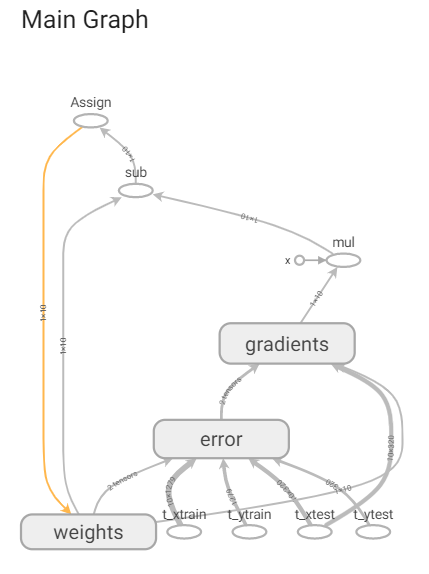

## Gráfica del Training Error

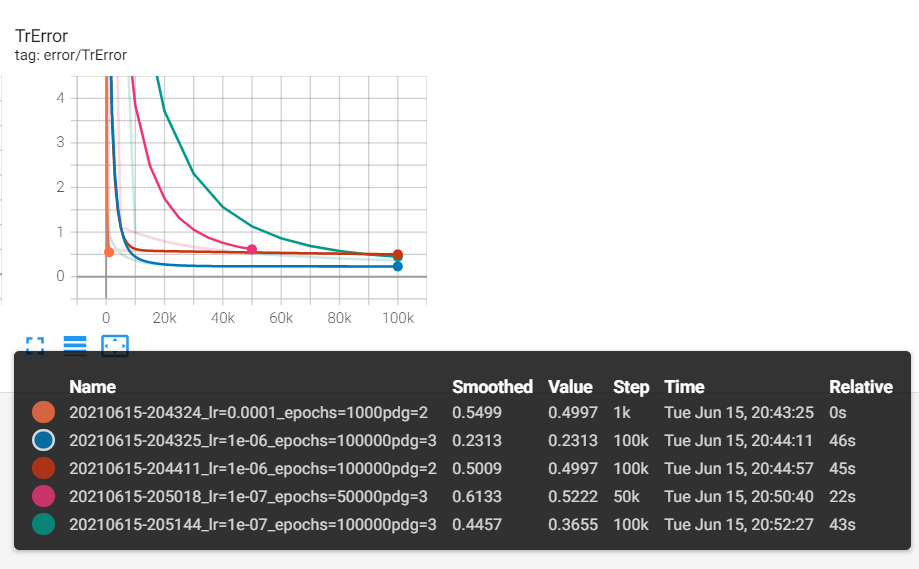

## Grafo del Test Error

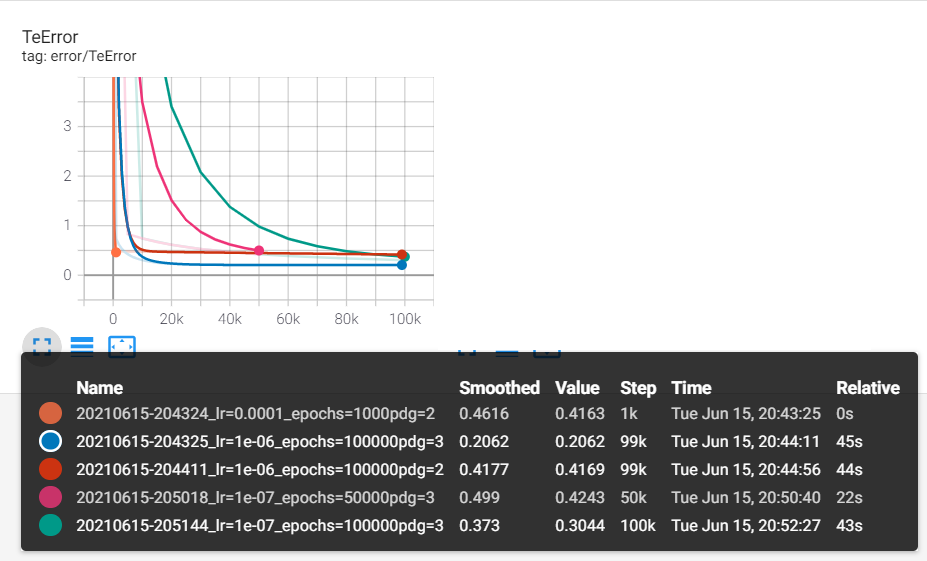

## Conclusión
El modelo que generó mejores resultados es uno de grado 3 con learning rate de 0.000001 y 100,000 iteraciones, teniendo como resultado un ***MSE de 0.2062***, aunque fue el más tardado en resolver (45s).